In [1]:
import pandas as pd

In [33]:
from scipy import sparse
from scipy import linalg

In [3]:
import tqdm.notebook as tq

In [4]:
from sklearn.manifold import TSNE
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("Reactions_Fingerprint_False.csv")

In [7]:
def fp_out_of_database_line(line_str):
    res_fp = np.zeros(2048)
    grps_idx = line_str.split(" ")
    for grp_idx in grps_idx[:-1]:
        idx = grp_idx.split("-")
        n = len(idx)
        if (n==1):
            res_fp[int(idx[0])] = 1
        elif n==2:
            res_fp[int(idx[0])] = int(idx[1])
        else:
            res_fp[int(idx[0])] = - int(idx[2])
    return res_fp

In [8]:
def fp_np_arr_out_of_database(database):
    progress_bar = tq.tqdm(total=database.shape[0])
    res_l = []
    for i in range(database.shape[0]):
        res_l.append(fp_out_of_database_line(database.iloc[i,1]))
        progress_bar.update(1)
    return np.array(res_l)

In [9]:
arr = fp_np_arr_out_of_database(data)

  0%|          | 0/250761 [00:00<?, ?it/s]

In [10]:
arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
model = TSNE(n_components=2, random_state=0)

In [12]:
X = model.fit_transform(arr[:5000])

In [36]:
U, S, V_T  = linalg.svd(X)

In [64]:
S

array([2213.5464, 1864.6293], dtype=float32)

In [59]:
l = [np.array([S[0],0.]), np.array([0.,S[1]])]
for i in range(4998):
    l.append(np.zeros(2))
S_diag = np.array(l)

In [55]:
S_diag.shape

(5000, 2)

In [45]:
U.shape

(5000, 5000)

In [47]:
V_T.shape

(2, 2)

In [61]:
S_diag.dot(V_T).shape

(5000, 2)

In [62]:
B = U.dot(S_diag.dot(V_T))

In [63]:
B

array([[-12.71136247,  22.74317819],
       [ 10.21703482, -54.6943266 ],
       [ 24.48079734,  -5.54702474],
       ...,
       [-47.64126481, -11.6808344 ],
       [ 35.63888132, -25.42848407],
       [  3.80449945,   4.75115408]])

In [29]:
test[0].shape

(5000, 5000)

In [31]:
test[1]

array([2213.5461, 1864.6296], dtype=float32)

In [18]:
X2 = model.fit_transform(arr[5000:10000])

In [14]:
x,y = X[:,0],X[:,1]

In [19]:
x2,y2 = X2[:,0],X2[:,1]

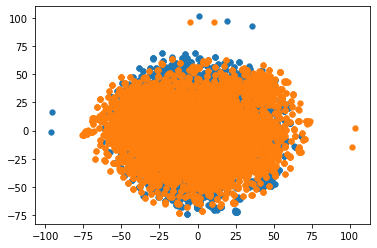

In [22]:
plt.scatter(x,y, linewidths=0.25)
plt.scatter(x2,y2, linewidths=0.25)

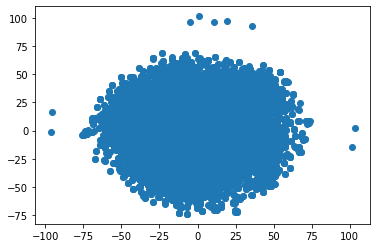

In [24]:
plt.scatter(np.concatenate([x,x2]),np.concatenate([y,y2]))